In [2]:
#importing of useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, learning_curve, train_test_split, cross_val_score, validation_curve


In [3]:
#load the dataset
df= pd.read_excel('C:/Users/user/.spyder-py3/Python-Machine-Learning-master/Dataset/titanic3 (3).xls')


In [4]:
#do some preprocessing by droping some unuseful columns

df= df.drop(['body', 'name', 'ticket', 'home.dest', 'boat', 'cabin'], axis= 1)

#split the data set in the train and test set
train_set, test_set= train_test_split(df, test_size= 0.2, random_state=0)

for i in df['pclass']:
    i= str(i)
    df['pclass']= i 

#examine objects variable in the data set
for col in df.select_dtypes('object'):
    print(col)

#split the train and test in features and target 
y_train= train_set['survived']
x_train= train_set.drop('survived', axis= 1)
y_test= test_set['survived']
x_test= test_set.drop('survived', axis= 1)


pclass
sex
embarked


In [16]:
#build an evaluation fonction of model
def evaluation(model):
    
    model.fit(x_train, y_train)
    ypred= model.predict(x_test)
    
    print('accuracy score: ', accuracy_score(y_test, ypred))
    
    N, train_score, val_score= learning_curve(model, x_train, y_train, cv= 4, scoring='accuracy',
                                              train_sizes= np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize= (5, 3))
    plt.plot(N, train_score.mean(axis= 1), label= 'train score')
    plt.plot(N, val_score.mean(axis= 1), label= 'val score')
    plt.legend()

In [19]:
#build pipeline and modelisation
categorical_features= ['pclass', 'sex', 'embarked']
numerical_features= ['age', 'sibsp', 'parch', 'fare']

numerical_pipeline= make_pipeline(SimpleImputer(strategy='mean'))
categorical_pipeline= make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

preprocessor= make_column_transformer((categorical_pipeline, categorical_features), 
                        (numerical_pipeline, numerical_features))

AdaBoost= make_pipeline(preprocessor, PolynomialFeatures(2), AdaBoostClassifier(n_estimators=100,
                                                                                learning_rate=0.5, random_state= 0, ))
SVM= make_pipeline(preprocessor, PolynomialFeatures(2), SVC(random_state= 0))
KNN= make_pipeline(preprocessor, PolynomialFeatures(2, include_bias=False), KNeighborsClassifier())
RandomForest= make_pipeline(preprocessor, PolynomialFeatures(2), RandomForestClassifier(random_state= 0))

models= {'AdaBoost': AdaBoost,
         'SVM': SVM,
         'KNN': KNN,
         'RandomForest': RandomForest
        }



AdaBoost
accuracy score:  0.8358778625954199
SVM
accuracy score:  0.648854961832061
KNN
accuracy score:  0.6908396946564885


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

RandomForest
accuracy score:  0.8015267175572519


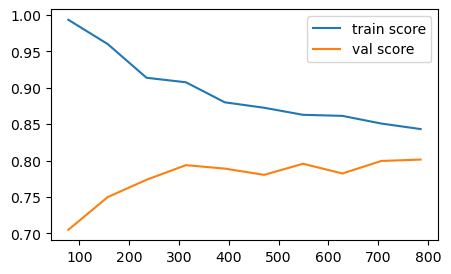

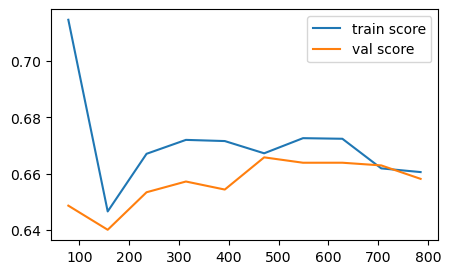

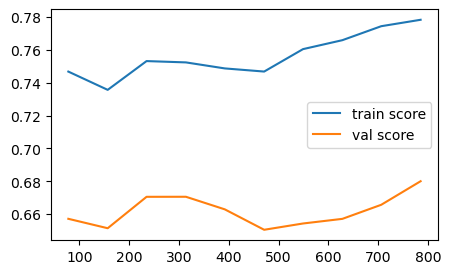

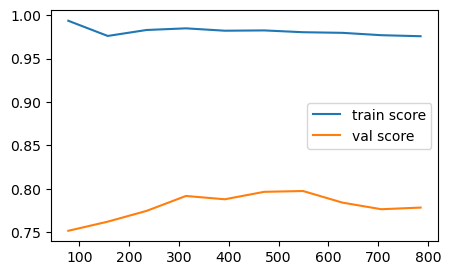

In [20]:
#evaluate different models to find the best
for name, model in models.items():
    print(name)
    evaluation(model)

accuracy score:  0.8358778625954199


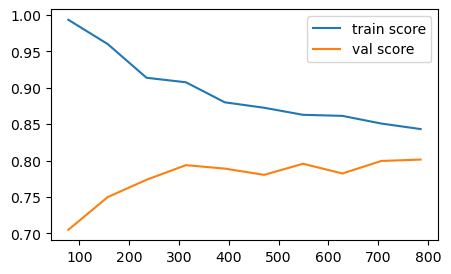

In [18]:
#save the best model and do the final evaluation
final_model= AdaBoost
evaluation(final_model)